<a href="https://colab.research.google.com/github/sohel62/20231091_Taslim_Mazumder_Sohel_Project_1st_Sem/blob/main/20231091_taslim_mazumder_sohel_project_1st_sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Roll: 20231091
Mohammad Taslim Mazumder Sohel
<br>Batch: 10th

**Project Plan:**
<br> I want to predict house rent for Dhaka city base on following labels,

*   Location
*   Area
*   No. of Beds
*   No. of Baths

# Import related python library

In [ ]:
# Import related python library
import pandas as pd
import numpy as np
from decimal import Decimal
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,6)
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data from source CSV file.

In [ ]:
# Load data from source CSV file.
df = pd.read_csv("houserent.csv")

# Print firs 5 rows
df.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


# Understanding the Detail of Dataset

In [ ]:
df.shape

print("\nDisplay info from Dataset\n",df.info())

print("\nData set type: ", type(df))

print("\nData types: \n", df.dtypes)

print("\n List of column name: ",df.columns)

print("\nCount empty house rent fields: ",display(df['Price'].notnull().sum()))
print("\nTotal Number of Locations: ",len(df['Location'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  28800 non-null  int64 
 1   Location    28800 non-null  object
 2   Area        28800 non-null  object
 3   Bed         28800 non-null  int64 
 4   Bath        28800 non-null  int64 
 5   Price       28800 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.3+ MB

Display info from Dataset
 None

Data set type:  <class 'pandas.core.frame.DataFrame'>

Data types: 
 Unnamed: 0     int64
Location      object
Area          object
Bed            int64
Bath           int64
Price         object
dtype: object

 List of column name:  Index(['Unnamed: 0', 'Location', 'Area', 'Bed', 'Bath', 'Price'], dtype='object')


28800


Count empty house rent fields:  None

Total Number of Locations:  730


# Scrub Errelevant Data

In [ ]:
#removing the unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


# Checking and Handle Missing Data

In [ ]:
df.isnull().sum()

Location    0
Area        0
Bed         0
Bath        0
Price       0
dtype: int64

# Fix structral data

In [ ]:
df['Area']=df['Area'].str.replace(',','')

In [ ]:
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka",1600 sqft,3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250 sqft,3,3,18 Thousand
3,"Gulshan 1, Gulshan, Dhaka",2200 sqft,3,4,75 Thousand
4,"Baridhara, Dhaka",2200 sqft,3,3,75 Thousand


In [ ]:
#removing the sqft from the area and making them int values
df['Area'] = df['Area'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-27-c7be29b76187>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area'] = df['Area'].apply(lambda x: int(x.split(' ')[0]))


In [ ]:
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18 Thousand
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75 Thousand
4,"Baridhara, Dhaka",2200,3,3,75 Thousand


# Scrub for Irrelevant Data


In [ ]:
df.Bed.unique()

array([3, 2, 4, 1, 5, 6])

In [ ]:
df.Bath.unique()

array([3, 2, 4, 5, 1, 6, 8])

In [ ]:
df[df.Bed>5]

,Location,Area,Bed,Bath,Price
304,"Gulshan 2, Gulshan, Dhaka",4500,6,6,2.8 Lakh
24464,"Tejturi Bazar, Tejgaon, Dhaka",2450,6,6,60 Thousand


In [ ]:
df[df.Bath>6] #8 baths!! noice but why?????

,Location,Area,Bed,Bath,Price
533,"Gulshan 2, Gulshan, Dhaka",4200,4,8,3 Lakh


In [ ]:
df1 = df.copy()


# Standardize

In [ ]:
#I wanted to make the price Thousand/Lakh values to a float values
def price_float(x):
    y = x.split(' ')[1]
    if y == "Thousand":
        return float(x.split(' ')[0]) * 1000
    else:
        return float(x.split(' ')[0]) * 100000

In [ ]:
df1.Price = df1.Price.apply(price_float)

In [ ]:
# Check a single value as, 304 no record
df1.loc[304]

Location    Gulshan 2, Gulshan, Dhaka
Area                             4500
Bed                                 6
Bath                                6
Price                        280000.0
Name: 304, dtype: object

In [ ]:
df1['price_per_sqft'] = df1['Price']/df1['Area']

In [ ]:
df1.head()

,Location,Area,Bed,Bath,Price,price_per_sqft
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000.0,12.500000
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000.0,22.222222
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000.0,14.400000
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000.0,34.090909
4,"Baridhara, Dhaka",2200,3,3,75000.0,34.090909


In [ ]:
len(df1['Location'].unique())

730

In [ ]:
#removing the comma in the Area column
df1['Location']=df1['Location'].str.replace(',','')

In [ ]:
df1.head()

,Location,Area,Bed,Bath,Price,price_per_sqft
0,Block H Bashundhara R-A Dhaka,1600,3,3,20000.0,12.500000
1,Farmgate Tejgaon Dhaka,900,2,2,20000.0,22.222222
2,Block B Nobodoy Housing Society Mohammadpur Dhaka,1250,3,3,18000.0,14.400000
3,Gulshan 1 Gulshan Dhaka,2200,3,4,75000.0,34.090909
4,Baridhara Dhaka,2200,3,3,75000.0,34.090909


In [ ]:
#Finding the locations with most number of houses
location_count = df1['Location'].value_counts(ascending=False)
location_count.head(30)

Mohammadpur Dhaka                                               757
Mirpur Dhaka                                                    556
Block D Section 12 Mirpur Dhaka                                 417
Dhanmondi Dhaka                                                 414
Block E Section 12 Mirpur Dhaka                                 411
Sector 10 Uttara Dhaka                                          357
Paikpara Ahmed Nagar Mirpur Dhaka                               352
Kallyanpur Mirpur Dhaka                                         337
Section 12 Mirpur Dhaka                                         311
Block B Section 12 Mirpur Dhaka                                 307
Joar Sahara Dhaka                                               305
Block C Section 12 Mirpur Dhaka                                 294
West Shewrapara Mirpur Dhaka                                    292
Shyamoli Dhaka                                                  285
PC Culture Housing Mohammadpur Dhaka            

In [ ]:
#Finding locations with less than 10 houses
len(location_count[location_count <= 10])

313

In [ ]:
len(df1['Location'].unique())

730

In [ ]:
#Keeping the locations with less houses together
location_count_under_10 = location_count[location_count <= 10]

In [ ]:
#now leveling them as 'other'
df1.Location = df1.Location.apply(lambda x: 'other' if x in location_count_under_10 else x)

In [ ]:
#now we have less unique values which will incress our accuracy
len(df1['Location'].unique())

418

In [ ]:
#now founding the unrealistic Area to Bed ratio according to my Civil engineer friend
df1[df1.Area/df1.Bed<300].head(10)

,Location,Area,Bed,Bath,Price,price_per_sqft
39,other,800,3,2,15000.0,18.750000
86,Block C Section 13 Mirpur Dhaka,745,3,2,15000.0,20.134228
135,other,800,3,2,15000.0,18.750000
186,Nayatola Maghbazar Dhaka,550,2,2,13000.0,23.636364
191,Baitul Aman Housing Society Adabor Dhaka,550,2,1,8500.0,15.454545
193,Taltola Khilgaon Dhaka,550,2,1,11000.0,20.000000
195,South Monipur Mirpur Dhaka,850,3,2,13000.0,15.294118
205,other,800,3,2,15000.0,18.750000
252,Block C Kaderabad Housing Society Bosila Moham...,750,3,2,16000.0,21.333333
260,Faydabad Dakshin Khan Dhaka,800,3,2,8500.0,10.625000


In [ ]:
df1.shape

(28800, 6)

In [ ]:
#removing them from our df
df2 = df1[~(df1.Area/df1.Bed<300)]
df2.shape

(27876, 6)

# Measures of central tendency

In [ ]:
#Lets see the description of the 'price_per_sqft'
df2.price_per_sqft.describe()

count    27876.000000
mean        18.946916
std          6.575892
min          6.500000
25%         15.384615
50%         18.000000
75%         20.952381
max        228.571429
Name: price_per_sqft, dtype: float64

# Outlier Detection Using IQR, and Extraction from Dataset

In [ ]:
def drop_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        # We know that, Lower Outlier < (Mean-Standard Deviation)
        # and Higher Outlier > (Mean+Standard Deviation)
        # So, we only keep data which gretar than Lower Outlier and samaller than Higher Outlier.
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = drop_outliers(df2)
df3.shape

(19913, 6)

# Data Visualization for Better Understanding the Datasets

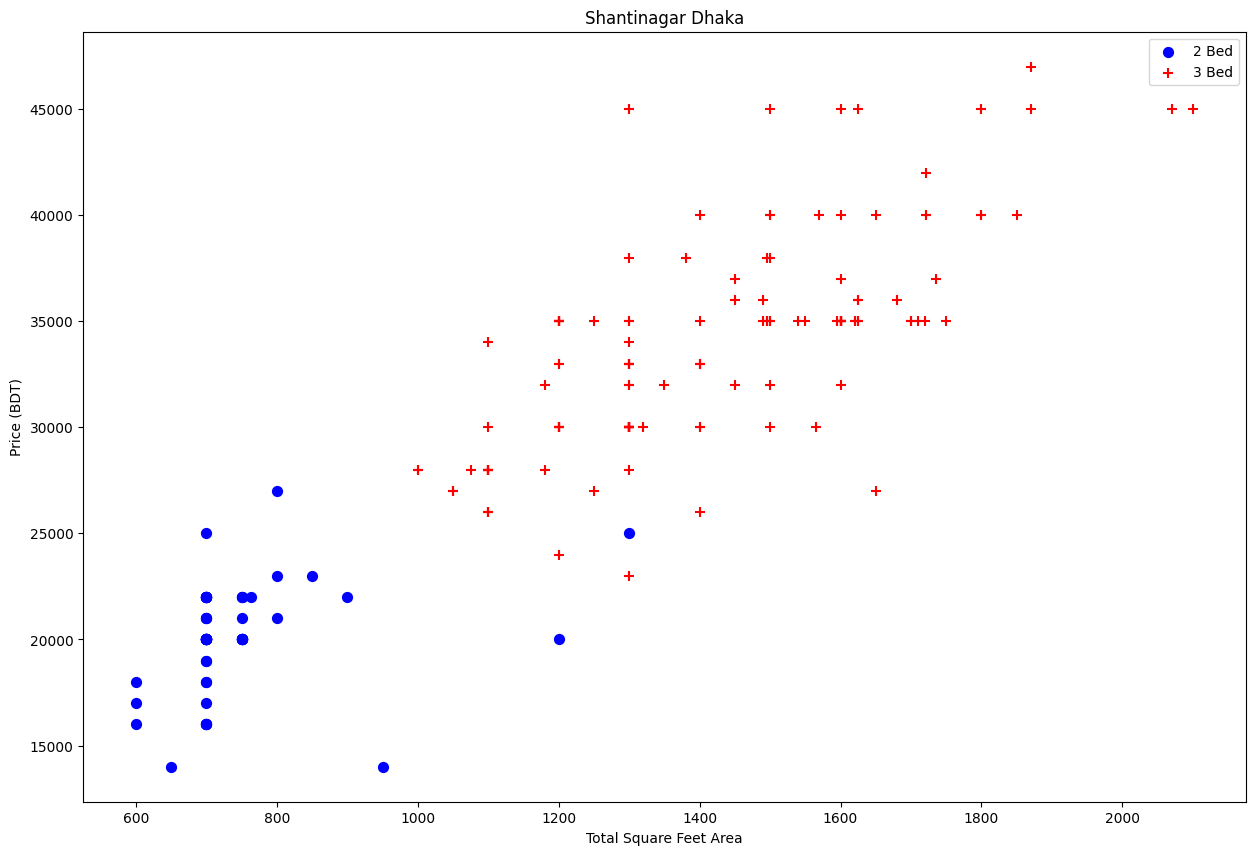

In [ ]:
#Building a scatter chart
def plot_scatter_chart(df,Location):
    bed2 = df[(df.Location==Location) & (df.Bed==2)]
    bed3 = df[(df.Location==Location) & (df.Bed==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bed2.Area,bed2.Price,color='blue',label='2 Bed', s=50)
    plt.scatter(bed3.Area,bed3.Price,marker='+', color='red',label='3 Bed', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (BDT)")
    plt.title(Location)
    plt.legend()

plot_scatter_chart(df3,"Shantinagar Dhaka")

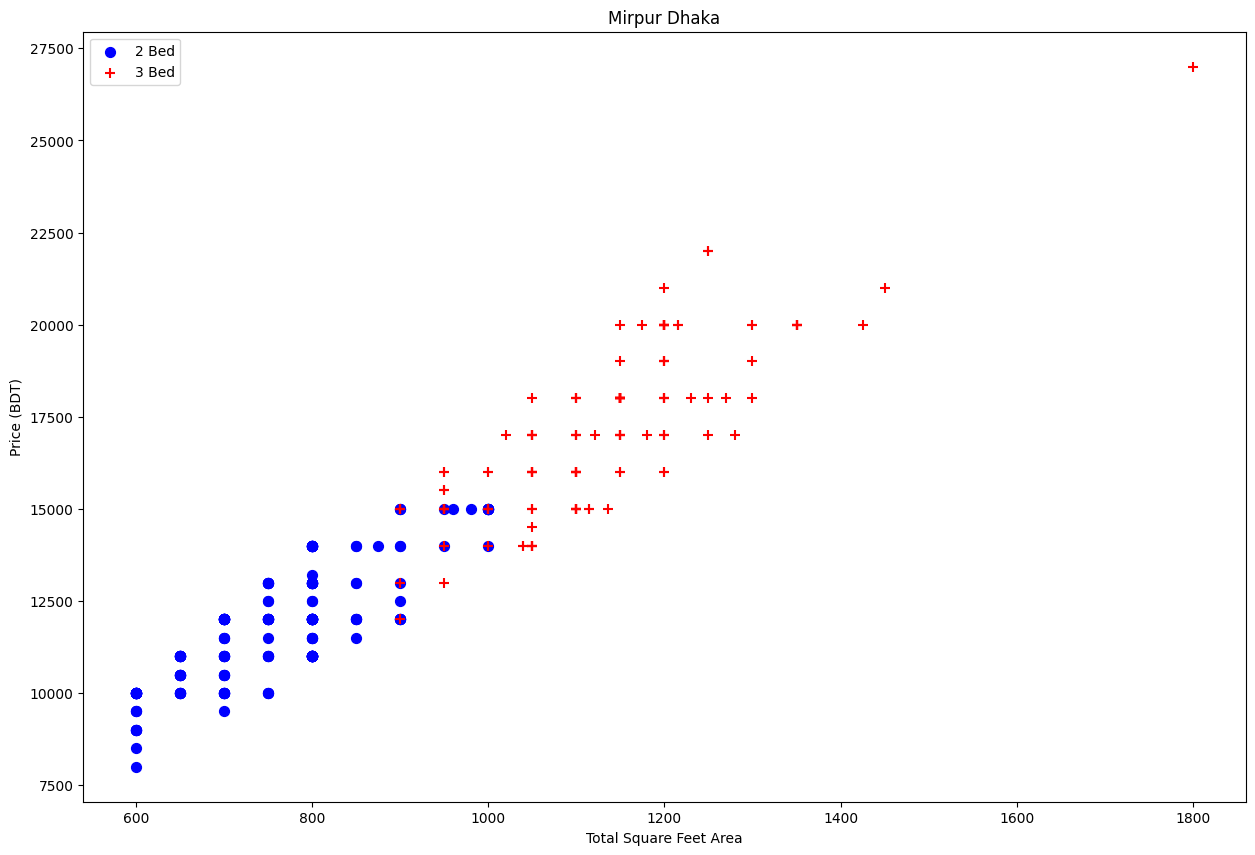

In [ ]:
plot_scatter_chart(df3,"Mirpur Dhaka")

Text(0, 0.5, 'Count')

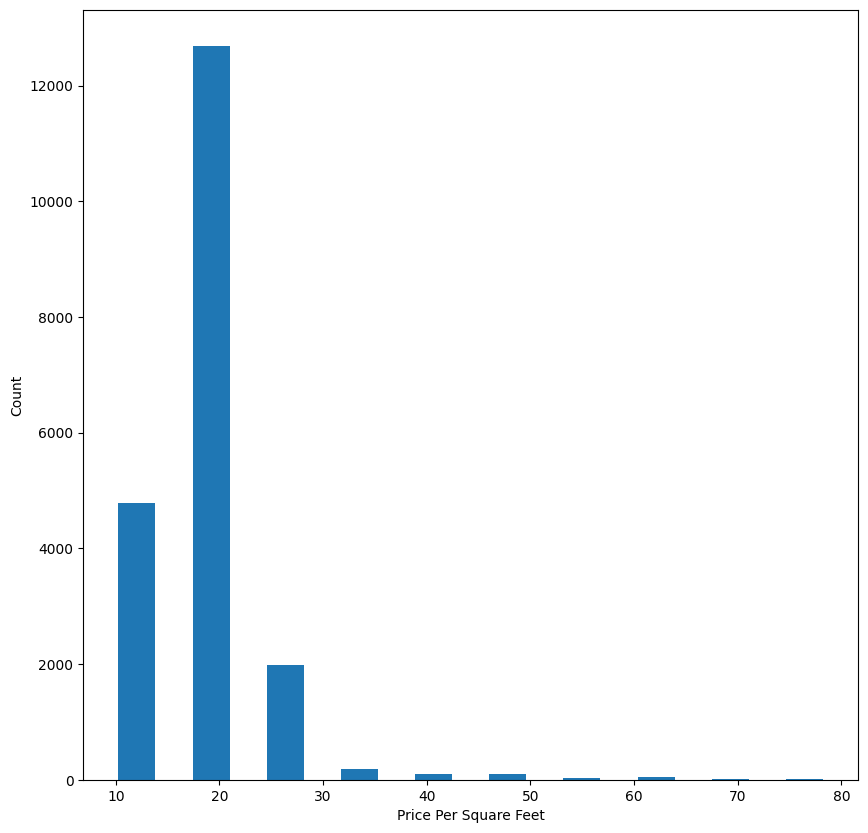

In [ ]:
matplotlib.rcParams["figure.figsize"] = (10,10)
plt.hist(df3.price_per_sqft,rwidth=0.5)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
df3[df3.Bath>df3.Bed+1] # this number of bed to bath ratio seems normal so not droping them

,Location,Area,Bed,Bath,Price,price_per_sqft
747,Avenue 6 Mirpur DOHS Mirpur Dhaka,2175,3,5,42000.0,19.310345
748,Avenue 6 Mirpur DOHS Mirpur Dhaka,2175,3,5,42000.0,19.310345
1227,Banani DOHS Dhaka,3000,3,5,130000.0,43.333333
1271,Banani Dhaka,2410,3,5,80000.0,33.195021
1688,Block A Bashundhara R-A Dhaka,2100,3,5,60000.0,28.571429
1689,Block A Bashundhara R-A Dhaka,2100,3,5,60000.0,28.571429
3967,Block D Bashundhara R-A Dhaka,3000,3,5,55000.0,18.333333
4038,Block D Bashundhara R-A Dhaka,1700,2,4,30000.0,17.647059
4112,Block D Bashundhara R-A Dhaka,2200,3,5,30000.0,13.636364
6097,Block J Baridhara Dhaka,2200,3,5,50000.0,22.727273


# Bulding categorical data

In [ ]:
dummies = pd.get_dummies(df3.Location)
dummies.head()

,1st Colony Mirpur Dhaka,2nd Colony Mirpur Dhaka,3rd Colony Mirpur Dhaka,Aainusbag Dakshin Khan Dhaka,Abdullahbag Uttar Badda Badda Dhaka,Abdur Rafique Housing Society Shekhertek Mohammadpur Dhaka,Adabor Dhaka,Adarsha Para Uttar Khan Dhaka,Agargaon Dhaka,Ahmed Nagar Mirpur Dhaka,...,West Kazipara Mirpur Dhaka,West Mollartek Dakshin Khan Dhaka,West Monipur Mirpur Dhaka,West Nakhalpara Tejgaon Dhaka,West Rampura Rampura Dhaka,West Shewrapara Mirpur Dhaka,West Vatara Vatara Badda Dhaka,Zafrabad Hazaribag Dhaka,aziz Moholla Mohammadpur Dhaka,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df4 = pd.concat([df3,dummies.drop('other',axis='columns')],axis='columns')
df4.head()

,Location,Area,Bed,Bath,Price,price_per_sqft,1st Colony Mirpur Dhaka,2nd Colony Mirpur Dhaka,3rd Colony Mirpur Dhaka,Aainusbag Dakshin Khan Dhaka,...,West Kalachandpur Kalachandpur Dhaka,West Kazipara Mirpur Dhaka,West Mollartek Dakshin Khan Dhaka,West Monipur Mirpur Dhaka,West Nakhalpara Tejgaon Dhaka,West Rampura Rampura Dhaka,West Shewrapara Mirpur Dhaka,West Vatara Vatara Badda Dhaka,Zafrabad Hazaribag Dhaka,aziz Moholla Mohammadpur Dhaka
0,1st Colony Mirpur Dhaka,800,2,2,13500.0,16.875000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Colony Mirpur Dhaka,700,2,2,12000.0,17.142857,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Colony Mirpur Dhaka,1100,3,3,20000.0,18.181818,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Colony Mirpur Dhaka,1100,3,3,20000.0,18.181818,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Colony Mirpur Dhaka,1020,3,2,15000.0,14.705882,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Area'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Bed'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Bath'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Price'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Area'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Bed'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Bath'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Price'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Area', 'Bed'], ['Bed', 'Bath'], ['Bath', 'Price'], ['Price', 'price_per_sqft']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['Bed', 'Area', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['Bed', 'Bath', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['Bed', 'Price', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['Bed', 'price_per_sqft', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_13, *['Area'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_14, *['Bed'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_15, *['Bath'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_16, *['Price'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_17, *['Area'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_18, *['Bed'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_19, *['Bath'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_20, *['Price'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_21, *[[['Area', 'Bed'], ['Bed', 'Bath'], ['Bath', 'Price'], ['Price', 'price_per_sqft']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_22, *['Bed', 'Area', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_23, *['Bed', 'Bath', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_24, *['Bed', 'Price', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_25, *['Bed', 'price_per_sqft', None], **{})
chart

In [ ]:
df5 = df4.drop('Location',axis='columns')
df5.head()

,Area,Bed,Bath,Price,price_per_sqft,1st Colony Mirpur Dhaka,2nd Colony Mirpur Dhaka,3rd Colony Mirpur Dhaka,Aainusbag Dakshin Khan Dhaka,Abdullahbag Uttar Badda Badda Dhaka,...,West Kalachandpur Kalachandpur Dhaka,West Kazipara Mirpur Dhaka,West Mollartek Dakshin Khan Dhaka,West Monipur Mirpur Dhaka,West Nakhalpara Tejgaon Dhaka,West Rampura Rampura Dhaka,West Shewrapara Mirpur Dhaka,West Vatara Vatara Badda Dhaka,Zafrabad Hazaribag Dhaka,aziz Moholla Mohammadpur Dhaka
0,800,2,2,13500.0,16.875000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,700,2,2,12000.0,17.142857,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1100,3,3,20000.0,18.181818,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1100,3,3,20000.0,18.181818,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1020,3,2,15000.0,14.705882,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_26, *['Area'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_27, *['Bed'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_28, *['Bath'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_29, *['Price'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_30, *['Area'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_31, *['Bed'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_32, *['Bath'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_33, *['Price'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_34, *[[['Area', 'Bed'], ['Bed', 'Bath'], ['Bath', 'Price'], ['Price', 'price_per_sqft']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_35, *['Bed', 'Area', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_36, *['Bed', 'Bath', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_37, *['Bed', 'Price', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_38, *['Bed', 'price_per_sqft', None], **{})
chart

## Model Building

In [ ]:
X = df5.drop(['Price','price_per_sqft'],axis='columns') #Had to drop 'price_per_sqft' because it was confusing the model and giving random negative predictions
X.head()

,Area,Bed,Bath,1st Colony Mirpur Dhaka,2nd Colony Mirpur Dhaka,3rd Colony Mirpur Dhaka,Aainusbag Dakshin Khan Dhaka,Abdullahbag Uttar Badda Badda Dhaka,Abdur Rafique Housing Society Shekhertek Mohammadpur Dhaka,Adabor Dhaka,...,West Kalachandpur Kalachandpur Dhaka,West Kazipara Mirpur Dhaka,West Mollartek Dakshin Khan Dhaka,West Monipur Mirpur Dhaka,West Nakhalpara Tejgaon Dhaka,West Rampura Rampura Dhaka,West Shewrapara Mirpur Dhaka,West Vatara Vatara Badda Dhaka,Zafrabad Hazaribag Dhaka,aziz Moholla Mohammadpur Dhaka
0,800,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,700,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1100,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1100,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1020,3,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df5.Price
y.head()

0    13500.0
1    12000.0
2    20000.0
3    20000.0
4    15000.0
Name: Price, dtype: float64

# Split Dataset into Training and Test data.

**75 % for training and 25% for testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

# Model Preparation
**We Prepare 4 Machine Learning Models and Train then Using Training Data. Also Check the Score of each model.**

# 1) Linear Regression

In [ ]:

# Create and fit the model
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

# Predict values
y_pred = lr_clf.predict(X_test)

p = lr_clf.score(X_test,y_test)
print("%.2f" % (p*100))

#sns.lmplot("Price", "LSTAT", df_boston)      #linear relationship berween price and LSTAT

91.49


In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.90588914, 0.90347762, 0.89696636, 0.91398475, 0.89820549])

# 2) Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
rdg_clf = Ridge(alpha=1.0)
rdg_clf.fit(X_train,y_train)
p = rdg_clf.score(X_test,y_test)
print("%.2f" % (p*100))

91.54


In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)

cross_val_score(Ridge(), X, y, cv=cv)

array([0.90683718, 0.90336858, 0.89706706, 0.91393935, 0.89846565])

# 3) Bayesian Regression

In [ ]:
from sklearn import linear_model
br_clf = linear_model.BayesianRidge()
br_clf.fit(X_train,y_train)
p = br_clf.score(X_test,y_test)
print("%.2f" % (p*100))

91.52


In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)

cross_val_score(linear_model.BayesianRidge(), X, y, cv=cv)

array([0.90635946, 0.90351694, 0.89707026, 0.91405138, 0.89836828])

# 4) Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
las_clf = Lasso(alpha=0.1)
las_clf.fit(X_train,y_train)
p = las_clf.score(X_test,y_test)
print("%.2f" % (p*100))

91.49


In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)

cross_val_score(Lasso(), X, y, cv=cv)

array([0.90524293, 0.90280499, 0.89606376, 0.91340253, 0.89731934])

# Lets Test How Well the Model Works

In [ ]:
def predict_price(Location,Area,Bed,Bath):
    index = np.where(X.columns == Location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Area
    x[1] = Bed
    x[2] = Bath
    if index >= 0:
        x[index] = 1

    return rdg_clf.predict([x])[0] #Ridge Regression got the best accuracy

# Now I predict with some new data after training and testing.

In [ ]:
#My family used to live in this area in a 1100 sqft appertment with 3 beds and 3 baths. And the rent was 16500 Taka
predict_price('Matikata Cantonment Dhaka',1250, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


17928.24219175511

In [ ]:
predict_price('Mirpur Dhaka',1250, 3, 3)

In [ ]:
predict_price('Gulshan 2 Gulshan Dhaka',2000, 3, 3)

In [ ]:
predict_price('Badda Dhaka',1000, 2, 2)